In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import matplotlib.image as mpimg
import glob

In [ ]:
import pandas as pd

Loading dataset


In [ ]:
images_birds= [cv2.imread(file, 0) for file in glob.glob('/content/drive/MyDrive/DROne bird dataset/Birds/*.jpeg')]
images_drones= [cv2.imread(file, 0) for file in glob.glob('/content/drive/MyDrive/DROne bird dataset/Drones/*.JPEG')]

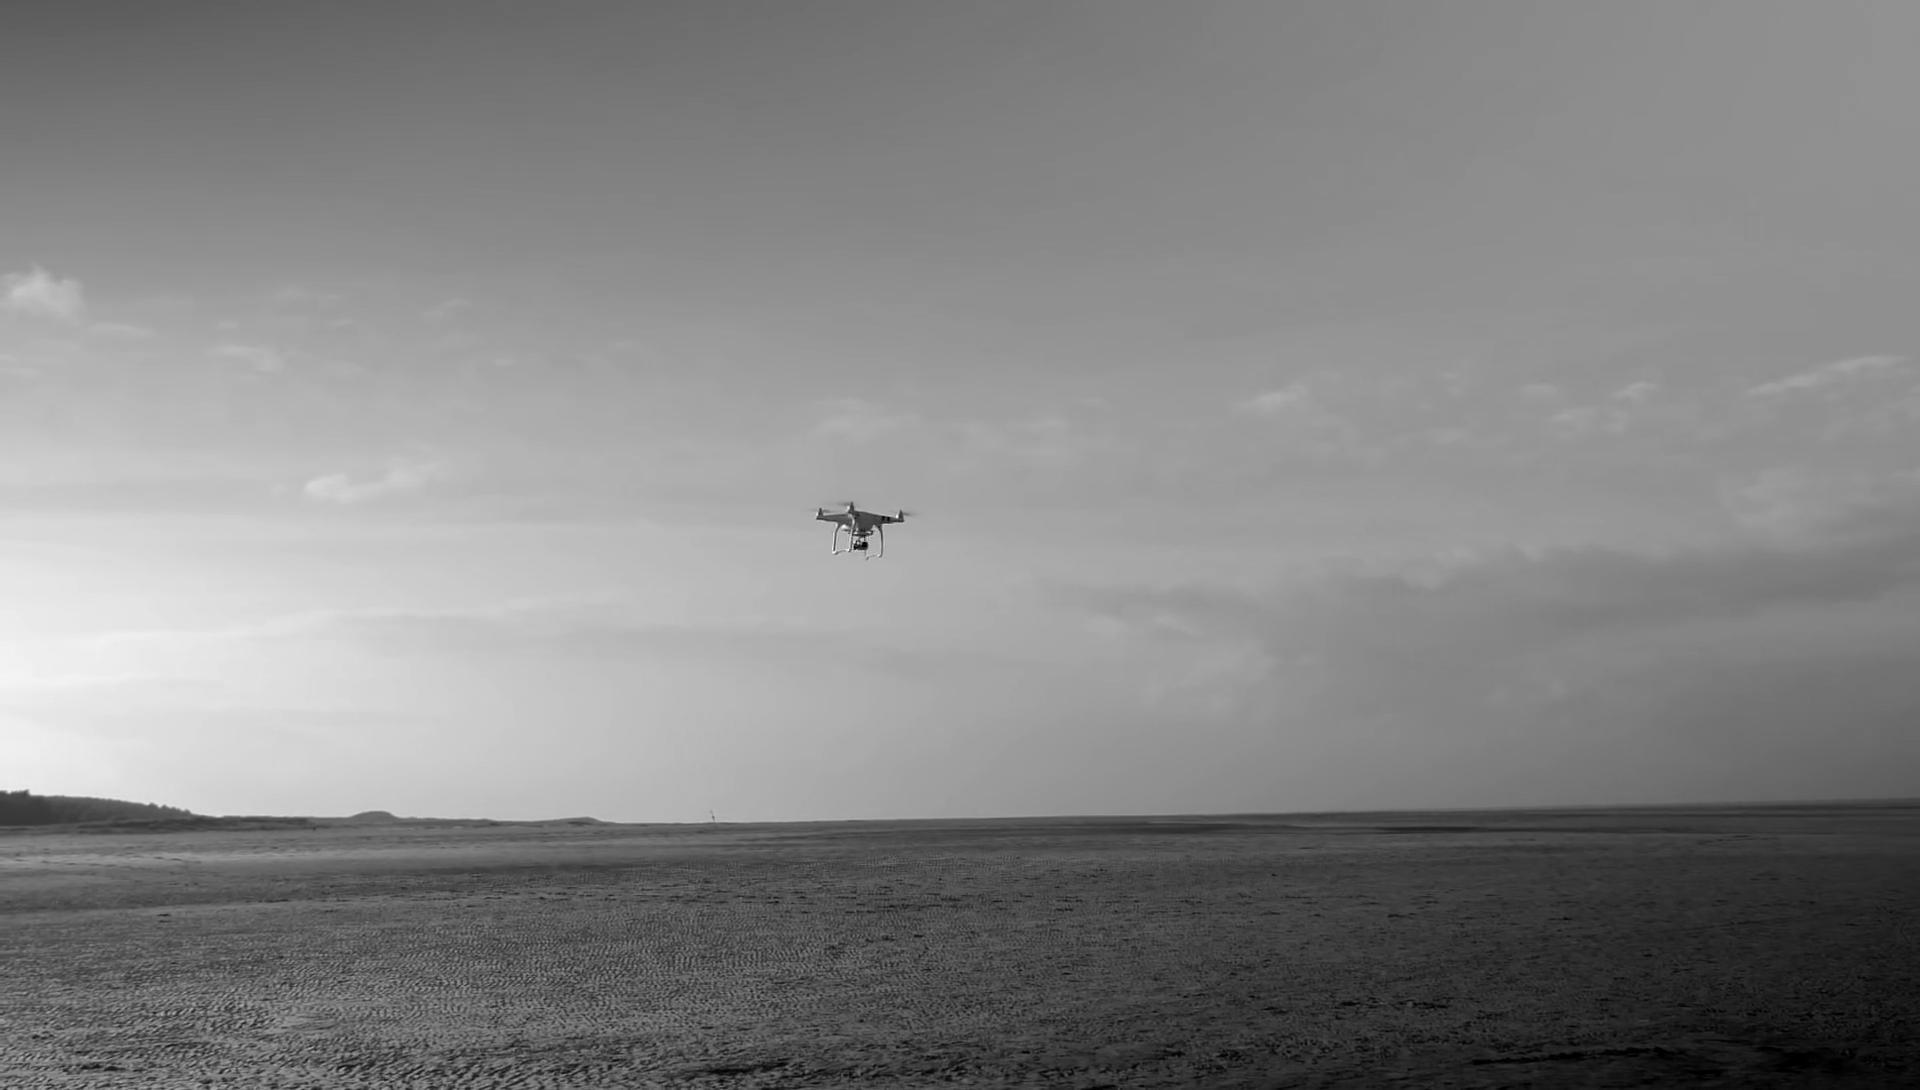

In [ ]:
cv2_imshow(images_drones[24])

In [ ]:
(len(images_birds),len(images_drones))

(396, 268)

grey scaling

In [ ]:
# plt.imshow(images_birds[0])
print(images_drones[44].shape)

(630, 1200)


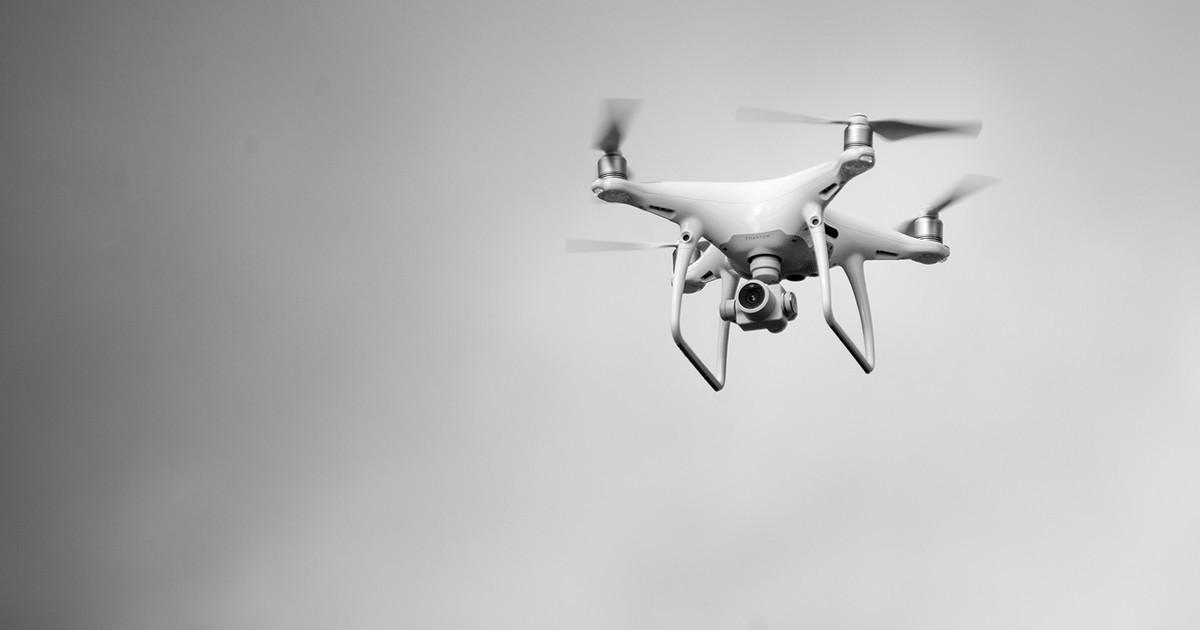

In [ ]:
cv2_imshow(images_drones[44])

Rescaling Images

In [ ]:
for i in range(len(images_birds)):
    images_birds[i]=cv2.resize(images_birds[i], (100,100))

In [ ]:
for i in range(len(images_drones)):
     images_drones[i]=cv2.resize(images_drones[i], (100,100))

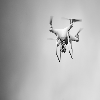

In [ ]:
cv2_imshow(images_drones[44])

In [ ]:
print(images_drones[44].shape)

(100, 100)


applying hog


In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [ ]:
hog_birds = []
hog_features_birds = []
hog_drones = []
hog_features_drones = []

In [ ]:
for i in range(len(images_birds)):
  hog_features, hog_image = hog(images_birds[i],
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16))
  hog_features_birds.append(hog_features)
  hog_birds.append(hog_image)

for i in range(len(images_drones)):
  hog_features, hog_image = hog(images_drones[i],
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16))
  hog_features_drones.append(hog_features)
  hog_drones.append(hog_image)

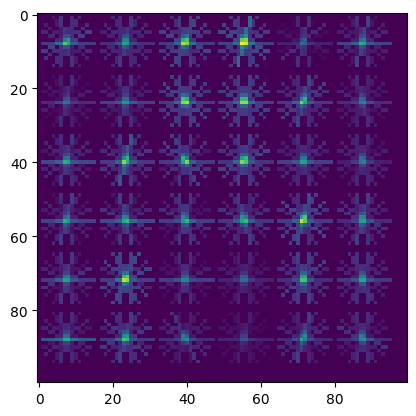

In [ ]:
plt.imshow(hog_drones[65])

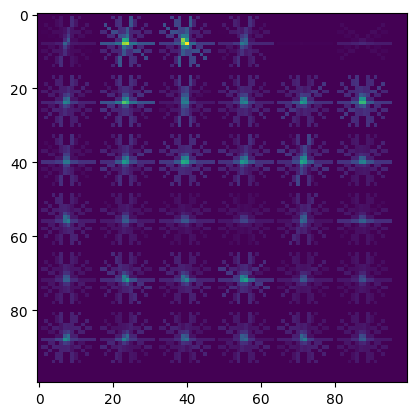

In [ ]:
plt.imshow(hog_drones[9])

Assigning labels

In [ ]:
hog_m=hog_features_birds+hog_features_drones

In [ ]:
hog_features_birds

[array([0.31378647, 0.30007785, 0.01376192, ..., 0.00247346, 0.        ,
        0.01167041]),
 array([0.02440612, 0.006615  , 0.00789621, ..., 0.07207021, 0.03931805,
        0.05120729]),
 array([0.04932228, 0.03160817, 0.02047549, ..., 0.07188849, 0.01422863,
        0.00806574]),
 array([0.16411918, 0.05012451, 0.07756038, ..., 0.00249587, 0.02321661,
        0.04574561]),
 array([0.09139569, 0.0672094 , 0.11265779, ..., 0.04834239, 0.07748249,
        0.05995983]),
 array([0.19026042, 0.17332833, 0.20140086, ..., 0.08507147, 0.05556474,
        0.04672118]),
 array([0.16600532, 0.08817001, 0.07149448, ..., 0.02677393, 0.00548712,
        0.00085084]),
 array([0.08967847, 0.04586572, 0.02725951, ..., 0.13945867, 0.16505101,
        0.03865376]),
 array([0.02677703, 0.00593818, 0.00496305, ..., 0.00592257, 0.00287406,
        0.00067742]),
 array([0.0660872 , 0.01728558, 0.0337231 , ..., 0.01316108, 0.00892682,
        0.00392678]),
 array([0.26498133, 0.26498133, 0.26498133, ..., 0

In [ ]:
len(hog_m)

664

In [ ]:
hog_m

[array([0.31378647, 0.30007785, 0.01376192, ..., 0.00247346, 0.        ,
        0.01167041]),
 array([0.02440612, 0.006615  , 0.00789621, ..., 0.07207021, 0.03931805,
        0.05120729]),
 array([0.04932228, 0.03160817, 0.02047549, ..., 0.07188849, 0.01422863,
        0.00806574]),
 array([0.16411918, 0.05012451, 0.07756038, ..., 0.00249587, 0.02321661,
        0.04574561]),
 array([0.09139569, 0.0672094 , 0.11265779, ..., 0.04834239, 0.07748249,
        0.05995983]),
 array([0.19026042, 0.17332833, 0.20140086, ..., 0.08507147, 0.05556474,
        0.04672118]),
 array([0.16600532, 0.08817001, 0.07149448, ..., 0.02677393, 0.00548712,
        0.00085084]),
 array([0.08967847, 0.04586572, 0.02725951, ..., 0.13945867, 0.16505101,
        0.03865376]),
 array([0.02677703, 0.00593818, 0.00496305, ..., 0.00592257, 0.00287406,
        0.00067742]),
 array([0.0660872 , 0.01728558, 0.0337231 , ..., 0.01316108, 0.00892682,
        0.00392678]),
 array([0.26498133, 0.26498133, 0.26498133, ..., 0

In [ ]:
labels=[]
for i in range(len(images_birds)):
  labels.append(0)
for i in range(len(images_drones)):
  labels.append(1)

In [ ]:
len(labels)

664

In [ ]:
label_array=np.array(labels)


In [ ]:
label_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Making and array having all images

In [ ]:
for i in range(len(images_drones)):
  images_birds.append(images_drones[i])

In [ ]:
len(images_birds)

664

In [ ]:
images_birds[0].shape


(100, 100)

In [ ]:
images_datasets=images_birds

In [ ]:
images_datasets[1]


array([[199, 199, 199, ..., 187, 187, 183],
       [198, 198, 198, ..., 187, 187, 183],
       [197, 197, 197, ..., 187, 187, 184],
       ...,
       [ 66,  62,  67, ...,  69,  75,  64],
       [ 71,  70,  77, ...,  66,  56,  61],
       [ 69,  80,  79, ...,  64,  64,  59]], dtype=uint8)

In [ ]:
image_array=np.array(images_datasets)

In [ ]:
image_array.shape

(664, 100, 100)

In [ ]:
image_array

array([[[ 97,  99, 101, ...,  99,  97,  95],
        [ 97,  99, 101, ..., 100,  98,  95],
        [ 97,  99, 101, ..., 100,  98,  96],
        ...,
        [ 48,  50,  52, ...,  47,  44,  41],
        [ 48,  50,  51, ...,  44,  42,  43],
        [ 47,  49,  51, ...,  42,  40,  38]],

       [[199, 199, 199, ..., 187, 187, 183],
        [198, 198, 198, ..., 187, 187, 183],
        [197, 197, 197, ..., 187, 187, 184],
        ...,
        [ 66,  62,  67, ...,  69,  75,  64],
        [ 71,  70,  77, ...,  66,  56,  61],
        [ 69,  80,  79, ...,  64,  64,  59]],

       [[160, 162, 164, ..., 148, 147, 145],
        [161, 163, 165, ..., 149, 148, 145],
        [163, 164, 166, ..., 149, 148, 146],
        ...,
        [170, 171, 173, ..., 159, 154, 156],
        [169, 171, 173, ..., 158, 155, 155],
        [168, 171, 172, ..., 156, 156, 154]],

       ...,

       [[ 88,  90,  91, ..., 106, 106, 105],
        [ 91,  93,  94, ..., 109, 108, 107],
        [ 93,  95,  97, ..., 112, 110, 109

Resizing the image array

In [ ]:
nsamples,nx, ny = image_array.shape
image_array_final= image_array.reshape((nsamples,nx*ny))

In [ ]:
image_array_final.shape

(664, 10000)

Creating a data frame

In [ ]:
image_rescaled=list(image_array_final)

In [ ]:
image_rescaled

[array([ 97,  99, 101, ...,  42,  40,  38], dtype=uint8),
 array([199, 199, 199, ...,  64,  64,  59], dtype=uint8),
 array([160, 162, 164, ..., 156, 156, 154], dtype=uint8),
 array([121, 122, 124, ..., 128, 127, 127], dtype=uint8),
 array([ 99, 102, 107, ..., 127, 122, 125], dtype=uint8),
 array([ 94,  95,  96, ..., 201, 200, 198], dtype=uint8),
 array([ 75,  76,  77, ..., 255, 255, 255], dtype=uint8),
 array([104,  97, 101, ..., 159, 163, 152], dtype=uint8),
 array([194, 196, 197, ..., 255, 255, 255], dtype=uint8),
 array([142, 142, 142, ..., 255, 255, 255], dtype=uint8),
 array([171, 191, 188, ..., 136, 135, 133], dtype=uint8),
 array([198, 202, 205, ...,   4,   1,   1], dtype=uint8),
 array([138, 134, 131, ..., 110, 111, 112], dtype=uint8),
 array([232, 231, 230, ..., 171, 171, 171], dtype=uint8),
 array([ 76,  78,  80, ..., 178, 176, 173], dtype=uint8),
 array([ 89,  90,  91, ..., 106, 106, 106], dtype=uint8),
 array([150, 155, 159, ..., 142, 140, 139], dtype=uint8),
 array([142, 1

In [ ]:
image_rescaled=list(zip(image_rescaled,labels))

In [ ]:
len(image_rescaled)

664

In [ ]:
image_rescaled

[(array([ 97,  99, 101, ...,  42,  40,  38], dtype=uint8), 0),
 (array([199, 199, 199, ...,  64,  64,  59], dtype=uint8), 0),
 (array([160, 162, 164, ..., 156, 156, 154], dtype=uint8), 0),
 (array([121, 122, 124, ..., 128, 127, 127], dtype=uint8), 0),
 (array([ 99, 102, 107, ..., 127, 122, 125], dtype=uint8), 0),
 (array([ 94,  95,  96, ..., 201, 200, 198], dtype=uint8), 0),
 (array([ 75,  76,  77, ..., 255, 255, 255], dtype=uint8), 0),
 (array([104,  97, 101, ..., 159, 163, 152], dtype=uint8), 0),
 (array([194, 196, 197, ..., 255, 255, 255], dtype=uint8), 0),
 (array([142, 142, 142, ..., 255, 255, 255], dtype=uint8), 0),
 (array([171, 191, 188, ..., 136, 135, 133], dtype=uint8), 0),
 (array([198, 202, 205, ...,   4,   1,   1], dtype=uint8), 0),
 (array([138, 134, 131, ..., 110, 111, 112], dtype=uint8), 0),
 (array([232, 231, 230, ..., 171, 171, 171], dtype=uint8), 0),
 (array([ 76,  78,  80, ..., 178, 176, 173], dtype=uint8), 0),
 (array([ 89,  90,  91, ..., 106, 106, 106], dtype=uint

In [ ]:
df_datasets=pd.DataFrame(image_rescaled,columns=['images','labels'])

In [ ]:
df_datasets

,images,labels
0,"[97, 99, 101, 103, 105, 107, 109, 113, 115, 11...",0
1,"[199, 199, 199, 199, 199, 199, 200, 200, 200, ...",0
2,"[160, 162, 164, 165, 169, 171, 180, 189, 187, ...",0
3,"[121, 122, 124, 124, 126, 126, 126, 128, 128, ...",0
4,"[99, 102, 107, 110, 114, 116, 124, 128, 130, 1...",0
...,...,...
659,"[222, 221, 222, 224, 227, 230, 233, 232, 235, ...",1
660,"[52, 54, 56, 57, 58, 58, 61, 61, 62, 64, 64, 6...",1
661,"[88, 90, 91, 93, 94, 94, 96, 97, 98, 98, 98, 9...",1
662,"[157, 158, 159, 162, 166, 177, 172, 169, 164, ...",1


In [ ]:
df_datasets = pd.concat([df_datasets, pd.DataFrame(df_datasets['images'].to_list(),
                                  columns=['feature_'+str(i) for i in range(len(df_datasets['images'].iloc[0]))])], axis=1)

# drop the original 'numbers' column
df_datasets = df_datasets.drop('images', axis=1)
print(df_datasets)

     labels  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0         0         97         99        101        103        105        107   
1         0        199        199        199        199        199        199   
2         0        160        162        164        165        169        171   
3         0        121        122        124        124        126        126   
4         0         99        102        107        110        114        116   
..      ...        ...        ...        ...        ...        ...        ...   
659       1        222        221        222        224        227        230   
660       1         52         54         56         57         58         58   
661       1         88         90         91         93         94         94   
662       1        157        158        159        162        166        177   
663       1         71         63         72         60         65         80   

     feature_6  feature_7  

In [ ]:
df_datasets

,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,0,97,99,101,103,105,107,109,113,115,...,55,53,52,51,49,47,44,42,40,38
1,0,199,199,199,199,199,199,200,200,200,...,75,62,68,66,76,57,67,64,64,59
2,0,160,162,164,165,169,171,180,189,187,...,92,127,151,182,180,160,156,156,156,154
3,0,121,122,124,124,126,126,126,128,128,...,136,136,133,162,163,131,131,128,127,127
4,0,99,102,107,110,114,116,124,128,130,...,134,134,135,134,131,128,129,127,122,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1,222,221,222,224,227,230,233,232,235,...,114,113,124,122,130,129,135,127,121,119
660,1,52,54,56,57,58,58,61,61,62,...,177,176,176,175,172,171,170,169,168,165
661,1,88,90,91,93,94,94,96,97,98,...,88,108,85,90,96,98,99,133,90,97
662,1,157,158,159,162,166,177,172,169,164,...,139,153,137,130,128,135,116,136,130,141


In [ ]:
X = df_datasets.drop("labels",axis=1)
y = df_datasets["labels"]


In [ ]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,97,99,101,103,105,107,109,113,115,119,...,55,53,52,51,49,47,44,42,40,38
1,199,199,199,199,199,199,200,200,200,201,...,75,62,68,66,76,57,67,64,64,59
2,160,162,164,165,169,171,180,189,187,180,...,92,127,151,182,180,160,156,156,156,154
3,121,122,124,124,126,126,126,128,128,129,...,136,136,133,162,163,131,131,128,127,127
4,99,102,107,110,114,116,124,128,130,134,...,134,134,135,134,131,128,129,127,122,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,222,221,222,224,227,230,233,232,235,239,...,114,113,124,122,130,129,135,127,121,119
660,52,54,56,57,58,58,61,61,62,64,...,177,176,176,175,172,171,170,169,168,165
661,88,90,91,93,94,94,96,97,98,98,...,88,108,85,90,96,98,99,133,90,97
662,157,158,159,162,166,177,172,169,164,162,...,139,153,137,130,128,135,116,136,130,141


Genetic Algorithm


In [ ]:
!pip install sklearn-genetic
from sklearn.neighbors import KNeighborsClassifier


from genetic_selection import GeneticSelectionCV

# Define your KNN classifier

knn = KNeighborsClassifier()

# Define your Genetic Selection CV object

selector = GeneticSelectionCV(knn,
                              cv=5,
                              verbose=4,
                              scoring="accuracy",
                              n_population=87,
                              crossover_proba=0.6,
                              mutation_proba=0.3,
                              n_generations=90,
                              crossover_independent_proba=0.6,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              caching=True,
                              n_jobs=-1)

# Fit your Genetic Selection CV object to your training data
selector.fit(X, y)

# Extract the selected features from your training and testing sets
X = selector.transform(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting features with genetic algorithm.
gen	nevals	avg                                     	std                                     	min                               	max                                     
0  	87    	[    0.719298  4842.517241     0.022179]	[    0.00456   2816.307511     0.003386]	[  0.710788  22.         0.016209]	[    0.745352  9908.           0.044422]
1  	65    	[    0.720442  3516.425287     0.021991]	[    0.004592  2272.992183     0.003588]	[  0.712303  22.         0.013537]	[    0.745352  9707.           0.044422]
2  	64    	[    0.72224   2469.758621     0.022438]	[    0.00447   1354.323125     0.003658]	[  0.715311  22.         0.015575]	[    0.745352  6880.           0.044422]
3  	71    	[    0.723453  2097.988506     0.022112]	[   0.003953  975.17254     0.003624]   	[  0.7153    22.         0.015575]	[    0.745352  4943.           0.044422]
4  	62    	[ 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
659    1
660    1
661    1
662    1
663    1
Name: labels, Length: 664, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(531, 29)

Modelling

Machine Learning

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8421052631578947
Precision: 0.7906976744186046
Recall: 0.7391304347826086
F1 Score: 0.7640449438202247


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

In [ ]:
accuracy=accuracy_score(y_pred_knn,y_test)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7518796992481203
Precision: 0.8421052631578947
Recall: 0.34782608695652173
F1 Score: 0.49230769230769234


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0])

In [ ]:
accuracy=accuracy_score(y_pred_dtc,y_test)
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7669172932330827
Precision: 0.6666666666666666
Recall: 0.6521739130434783
F1 Score: 0.6593406593406593


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0])

In [ ]:
accuracy=accuracy_score(y_pred_nb,y_test)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6992481203007519
Precision: 0.55
Recall: 0.717391304347826
F1 Score: 0.6226415094339623


Deep Learning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create an AdaBoost classifier with specified parameters
base_classifier = DecisionTreeClassifier(max_depth=1)  # base classifier
n_estimators = 50  # number of estimators (weak classifiers)
learning_rate = 0.1  # learning rate
random_state = 42  # random seed for reproducibility

adaboost = AdaBoostClassifier(base_estimator=base_classifier,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate,
                              random_state=random_state)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


NameError: ignored

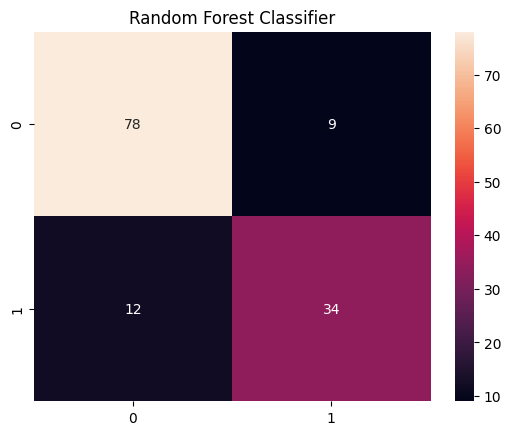

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.title("Random Forest Classifier")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show();